# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Divisão da base em treino, validação e teste**
    - 3.1. Salvando os dataframes em formato parquet
4. **Análise do dataframe _df_train_val_**
    - 4.1. Correção e ajuste das variáveis
    - 4.2. Análise das medidas estatísticas
        - 4.2.1. Análise descritiva das variáveis
        - 4.2.2. Distribuição dos dados em gráfico boxplot
        - 4.2.3. Análise dos outliers identificados


<br>

---

<br>

## 1. Importação de bibliotecas

In [44]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import os

from sklearn.model_selection import train_test_split

In [45]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar para exibir todas as colunas do Dataframe
pd.set_option('display.max_columns', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [46]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 103285


In [47]:
# Caminho do arquivo de dados
caminho = f'dados/ABT'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')

In [48]:
df.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_card,client_id_card,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_client,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,code,description,transaction_id,is_fraud
0,7475806,2010-01-01 09:05:00,1840,4568,$2.02,Swipe Transaction,35451,Beaverton,OR,97005.0,5812,None,4568,1840,Visa,Debit (Prepaid),4733359418335581,09/2021,67,YES,2,$4,09/2004,2008,No,1840,46,71,1974,2,Female,576 Martin Luther King Street,45.49,-122.80,$21702,$44249,$103229,706,5,5812,Eating Places and Restaurants,7475806.0,No
1,7477473,2010-01-01 15:08:00,538,4161,$7.48,Swipe Transaction,26810,Winterville,NC,28590.0,5541,None,4161,538,Mastercard,Debit,5885105668024939,12/2014,750,YES,2,$6993,08/2005,2016,No,538,66,69,1954,2,Female,7888 Fourth Street,35.30,-77.15,$14844,$30265,$36789,814,4,5541,Service Stations,7477473.0,No
2,7477784,2010-01-01 16:18:00,724,2876,$1.70,Swipe Transaction,59935,Cushing,OK,74023.0,5499,None,2876,724,Mastercard,Debit,5832356224925490,06/2024,245,YES,2,$16476,05/2005,2008,No,724,45,72,1974,5,Female,819 El Camino Boulevard,35.97,-96.76,$17237,$35142,$107898,731,4,5499,Miscellaneous Food Stores,NaN,None
3,7477811,2010-01-01 16:25:00,377,1175,$-53.00,Swipe Transaction,43293,Withee,WI,54498.0,5499,None,1175,377,Mastercard,Debit,5009400051376027,11/2023,417,YES,1,$30403,02/2009,2014,No,377,80,67,1940,1,Female,305 Pine Avenue,47.39,-122.26,$24884,$39110,$363,750,5,5499,Miscellaneous Food Stores,NaN,None
4,7478410,2010-01-01 18:55:00,1362,2145,$-295.00,Swipe Transaction,96185,Bladensburg,MD,20710.0,7011,None,2145,1362,Mastercard,Debit,5566695688917047,03/2017,309,NO,2,$29708,03/2007,2009,No,1362,58,67,1962,1,Male,3385 Hill Lane,38.78,-77.27,$35563,$72510,$44317,727,4,7011,"Lodging - Hotels, Motels, Resorts",NaN,None
5,7478830,2010-01-01 21:25:00,1466,5884,$17.59,Online Transaction,16798,ONLINE,None,NaN,4121,None,5884,1466,Mastercard,Debit,5946854129119703,09/2020,405,YES,1,$1866,12/2007,2014,No,1466,36,75,1983,4,Female,3194 Norfolk Street,38.64,-75.61,$17624,$35933,$23451,812,2,4121,Taxicabs and Limousines,NaN,None
6,7479105,2010-01-01 23:02:00,1693,5940,$4.33,Online Transaction,85247,ONLINE,None,NaN,5815,None,5940,1693,Mastercard,Debit,5128104617797218,03/2017,726,YES,1,$33506,12/2008,2011,No,1693,36,69,1983,4,Female,478 East Drive,33.61,-111.89,$36300,$74016,$85204,702,2,5815,"Digital Goods - Media, Books, Apps",7479105.0,No
7,7480284,2010-01-02 11:11:00,1674,2873,$27.78,Swipe Transaction,60569,Jonesboro,AR,72401.0,5300,None,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,$8800,05/2005,2011,No,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,$14172,$26858,$11245,712,2,5300,Wholesale Clubs,7480284.0,No
8,7480339,2010-01-02 11:27:00,1070,4138,$35.20,Swipe Transaction,99256,Marion,IA,52302.0,5411,None,4138,1070,Mastercard,Debit,5588241759620390,08/2022,902,YES,1,$28666,08/2004,2010,No,1070,61,65,1958,11,Male,841 Wessex Boulevard,42.03,-91.58,$25275,$51528,$58509,745,6,5411,"Grocery Stores, Supermarkets",NaN,None
9,7480412,2010-01-02 11:46:00,509,4588,$5.54,Swipe Transaction,60569,Charmco,WV,25958.0,5300,None,4588,509,Visa,Debit,4262181069766792,07/2022,519,YES,1,$12721,09/2005,2015,No,509,33,66,1986,7,Male,239 Sussex Drive,38.41,-82.43,$21842,$44534,$107410,702,4,5300,Wholesale Clubs,7480412.0,No


## 3. Divisão da base em treino, validação e teste

In [49]:
# Criando os dataframes com base no target 'is_fraud'

# DataFrame de treino e validação (valores 'Yes' e 'No')
df_train_val = df[df['is_fraud'].isin(['Yes', 'No'])].copy()

# DataFrame de teste (valores None)
df_test = df[df['is_fraud'].isnull()].copy()

In [50]:
# Dividindo o dataframe de treino e validação, mantendo a proporção das classes do target 'is_fraud'
df_train, df_val = train_test_split(
    df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['is_fraud']
)

In [51]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_train': df_train,
    'df_val': df_val,
    'df_test': df_test,
}

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
print(f'\nVOLUMETRIA')
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]:,}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]:,}')  


VOLUMETRIA

df_train
---------------------------------------------
Quantidade de linhas (registros):  3,566,068
Quantidade de colunas (variáveis): 43

df_val
---------------------------------------------
Quantidade de linhas (registros):  891,518
Quantidade de colunas (variáveis): 43

df_test
---------------------------------------------
Quantidade de linhas (registros):  2,194,300
Quantidade de colunas (variáveis): 43


### 3.1. Salvando os dataframes em formato parquet

In [52]:
# Iteração sobre o dicionário para exportação dos dataframes em formato parquet
for nome, df in dfs.items():
    
    # Diretório onde os dados serão salvos
    caminho = f'dados/dados_parquet/'
    
    # Cria o diretório se não existir
    os.makedirs(caminho, exist_ok=True)
    
    try:      
        # Exportar para Parquet
        df.to_parquet(caminho + nome + '.parquet', engine='pyarrow', index=False)
        
        # Valida a quantidade de linhas e colunas
        print(f'\nO {nome} possui {df.shape[0]:,} linhas e {df.shape[1]:,} colunas')
    except Exception as e:
        print(f'\nErro ao exportar {nome}:\n {e}')


O df_train possui 3,566,068 linhas e 43 colunas

O df_val possui 891,518 linhas e 43 colunas

O df_test possui 2,194,300 linhas e 43 colunas


## 4. Análise do dataframe _df_train_val_

In [53]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA\n')
print(f'Quantidade de linhas (registros):  {df_train_val.shape[0]:,}')
print(f'Quantidade de colunas (variáveis): {df_train_val.shape[1]:,}')


VOLUMETRIA

Quantidade de linhas (registros):  4,457,586
Quantidade de colunas (variáveis): 43


In [54]:
df_train_val.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_card,client_id_card,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,id_client,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,code,description,transaction_id,is_fraud
0,7475806,2010-01-01 09:05:00,1840,4568,$2.02,Swipe Transaction,35451,Beaverton,OR,97005.0,5812,None,4568,1840,Visa,Debit (Prepaid),4733359418335581,09/2021,67,YES,2,$4,09/2004,2008,No,1840,46,71,1974,2,Female,576 Martin Luther King Street,45.49,-122.80,$21702,$44249,$103229,706,5,5812,Eating Places and Restaurants,7475806.0,No
1,7477473,2010-01-01 15:08:00,538,4161,$7.48,Swipe Transaction,26810,Winterville,NC,28590.0,5541,None,4161,538,Mastercard,Debit,5885105668024939,12/2014,750,YES,2,$6993,08/2005,2016,No,538,66,69,1954,2,Female,7888 Fourth Street,35.30,-77.15,$14844,$30265,$36789,814,4,5541,Service Stations,7477473.0,No
6,7479105,2010-01-01 23:02:00,1693,5940,$4.33,Online Transaction,85247,ONLINE,None,NaN,5815,None,5940,1693,Mastercard,Debit,5128104617797218,03/2017,726,YES,1,$33506,12/2008,2011,No,1693,36,69,1983,4,Female,478 East Drive,33.61,-111.89,$36300,$74016,$85204,702,2,5815,"Digital Goods - Media, Books, Apps",7479105.0,No
7,7480284,2010-01-02 11:11:00,1674,2873,$27.78,Swipe Transaction,60569,Jonesboro,AR,72401.0,5300,None,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,$8800,05/2005,2011,No,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,$14172,$26858,$11245,712,2,5300,Wholesale Clubs,7480284.0,No
9,7480412,2010-01-02 11:46:00,509,4588,$5.54,Swipe Transaction,60569,Charmco,WV,25958.0,5300,None,4588,509,Visa,Debit,4262181069766792,07/2022,519,YES,1,$12721,09/2005,2015,No,509,33,66,1986,7,Male,239 Sussex Drive,38.41,-82.43,$21842,$44534,$107410,702,4,5300,Wholesale Clubs,7480412.0,No
11,7482356,2010-01-02 20:04:00,1936,5914,$7.45,Swipe Transaction,21739,Richmond,VT,5477.0,5300,None,5914,1936,Visa,Debit,4653215018449189,09/2014,624,YES,1,$27006,12/2007,2007,No,1936,86,68,1933,7,Female,406 El Camino Boulevard,44.40,-73.00,$26951,$35685,$1135,714,5,5300,Wholesale Clubs,7482356.0,No
14,7482814,2010-01-02 23:36:00,1896,4974,$16.08,Swipe Transaction,60569,Plymouth,MI,48170.0,5300,None,4974,1896,Visa,Credit,4468355695964457,12/2023,955,YES,1,$14000,10/2002,2008,No,1896,50,79,1969,9,Female,6695 River Lane,41.91,-83.38,$19736,$40246,$74352,641,5,5300,Wholesale Clubs,7482814.0,No
16,7484660,2010-01-03 13:14:00,1857,5089,$39.77,Swipe Transaction,91128,Morris Plains,NJ,7950.0,5411,None,5089,1857,Mastercard,Credit,5571571366314376,07/2024,126,YES,1,$27700,10/2007,2013,No,1857,32,66,1987,8,Male,4063 Burns Boulevard,40.77,-74.39,$47698,$97248,$197100,775,5,5411,"Grocery Stores, Supermarkets",7484660.0,No
18,7486009,2010-01-03 18:19:00,1079,5826,$188.80,Swipe Transaction,5373,Rockville Centre,NY,11570.0,4900,None,5826,1079,Amex,Credit,362822137135948,10/2022,44,YES,1,$13400,12/2005,2010,No,1079,65,60,1954,11,Female,422 Madison Lane,40.66,-73.63,$48994,$103294,$39076,831,3,4900,"Utilities - Electric, Gas, Water, Sanitary",7486009.0,No
20,7487202,2010-01-04 07:35:00,1786,5463,$10.28,Swipe Transaction,60354,Louisville,OH,44641.0,5411,None,5463,1786,Mastercard,Credit,5639561447744152,11/2020,247,YES,1,$18400,11/2006,2014,No,1786,48,63,1971,3,Female,7554 Sixth Street,40.83,-81.26,$18936,$38611,$93255,755,5,5411,"Grocery Stores, Supermarkets",7487202.0,No


In [55]:
# Função para geração de um dataframe de metadados

def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    
    # Calculando as métricas
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': dataframe.isnull().mean() * 100,
        'Cardinalidade': dataframe.nunique()
    })

    # Ordenando o DataFrame pelos valores de 'Qtde de nulos' em ordem decrescente
    metadados = metadados \
        .sort_values(by='Qtde de nulos', ascending=False) \
        .reset_index(drop=True)
    
    # Arredondando a coluna '% de nulos' para duas casas decimais
    metadados['% de nulos'] = metadados['% de nulos'].round(2)

    return metadados

In [56]:
# Exibindo os metadados do dataframe

gerar_metadados(df_train_val)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,errors,object,4386447,98.40,22
1,zip,float64,554327,12.44,23127
2,merchant_state,object,524586,11.77,191
3,client_id,int32,0,0.00,1219
4,date,datetime64[ns],0,0.00,2685814
5,card_id,int32,0,0.00,4070
6,amount,object,0,0.00,55649
7,merchant_id,int32,0,0.00,53024
8,use_chip,object,0,0.00,3
9,merchant_city,object,0,0.00,11528


### 4.1. Correção e ajuste das variáveis

- Variáveis **amount**, **credit_limit**, **per_capita_income**, **yearly_income** e **total_debt**

In [57]:
# Função para limpar e converter colunas monetárias

def limpar_e_converter_monetarios(dataframe, colunas):
    '''
    Limpa e converte as colunas monetárias do dataframe fornecido.

    :param dataframe: DataFrame
        DataFrame a ser limpo e convertido.
    :param colunas: List
        Lista de colunas a serem limpadas e convertidas.
    :return: DataFrame  
        DataFrame com as colunas limpas e convertidas.
    '''
    
    # Expressão regular para remover símbolos de dólar e vírgulas
    for coluna in colunas:
        # Remover '$' e ',' usando regex e converter para float
        dataframe[coluna] = dataframe[coluna].replace({'\$': '', ',': ''}, regex=True)
        # Convertendo para float, valores não convertíveis se tornam NaN
        dataframe[coluna] = pd.to_numeric(dataframe[coluna], errors='coerce').astype(float)

    return dataframe

In [58]:
# Lista de colunas monetárias
colunas_monetarias = ['amount', 'credit_limit', 'per_capita_income', 'yearly_income', 'total_debt']

# Aplicando a função para limpar e converter as colunas monetárias
df_train_val = limpar_e_converter_monetarios(df_train_val, colunas_monetarias)

- Variável **errors**

In [59]:
# Exibindo os valores únicos da coluna 'errors'
df_train_val['errors'].unique()

array([None, 'Insufficient Balance',
       'Bad Card Number,Insufficient Balance', 'Bad PIN',
       'Bad Expiration', 'Technical Glitch', 'Bad CVV', 'Bad Card Number',
       'Bad Zipcode', 'Bad Expiration,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad CVV,Insufficient Balance',
       'Insufficient Balance,Technical Glitch',
       'Bad Expiration,Insufficient Balance', 'Bad Expiration,Bad CVV',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Card Number,Bad Expiration', 'Bad PIN,Technical Glitch',
       'Bad Card Number,Bad CVV', 'Bad CVV,Technical Glitch',
       'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch'],
      dtype=object)

In [60]:
# Preenchendo os valores nulos da coluna 'errors' com 'no errors'
df_train_val['errors'].fillna('no errors', inplace=True)

- Variáveis **merchant_state** e **zip**

In [61]:
# Preenchendo os valores nulos da coluna 'merchant_state' com 'ONLINE' 
# de acordo com o valor 'ONLINE' da coluna 'merchant_city'
df_train_val.loc[df_train_val['merchant_city'] == 'ONLINE', 'merchant_state'] = 'ONLINE'

In [62]:
# Preenchendo os valores nulos da coluna 'zip' com '0' (zero) 
df_train_val['zip'].fillna(0, inplace=True)

- Verificando a existência de registros duplicados

In [63]:
# Exibindo a quantidade de registros duplicados

df_train_val.duplicated(keep='first').value_counts(
).to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,4457586


In [64]:
# Exibindo os metadados do dataframe

gerar_metadados(df_train_val)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,id,int32,0,0.0,4457586
1,date,datetime64[ns],0,0.0,2685814
2,client_id,int32,0,0.0,1219
3,card_id,int32,0,0.0,4070
4,amount,float64,0,0.0,55648
5,use_chip,object,0,0.0,3
6,merchant_id,int32,0,0.0,53024
7,merchant_city,object,0,0.0,11528
8,merchant_state,object,0,0.0,192
9,zip,float64,0,0.0,23128


### 4.2. Análise das medidas estatísticas

#### 4.2.1. Análise descritiva das variáveis

In [68]:
# Lista de colunas que serão excluídas da análise
colunas_excluir = [
    'id','transaction_id', 'merchant_id', 'zip', 'card_number', 
    'client_id_card','mcc', 'code', 'cvv', 'card_id','id_card', 
    'client_id', 'id_client', 'latitude', 'longitude'
]

In [ ]:
# Obtém as colunas do dataframe que são numéricas
cols = df_train_val.select_dtypes(include=['number']).columns.drop(colunas_excluir) 
                                                                   
# Gera a estatística descritiva e transpõe o resultado
df_train_val[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
amount,4457586.0,42.977301,81.685091,-500.0,8.92,28.97,63.68,5696.78
num_cards_issued,4457586.0,1.522061,0.515259,1.0,1.00,2.00,2.00,3.00
credit_limit,4457586.0,15550.693885,12188.753721,0.0,8100.00,13455.00,20839.00,141391.00
year_pin_last_changed,4457586.0,2011.340960,2.894696,2002.0,2010.00,2011.00,2013.00,2020.00
current_age,4457586.0,54.024146,15.718764,23.0,42.00,52.00,63.00,101.00
retirement_age,4457586.0,66.487441,3.586364,53.0,65.00,66.00,68.00,79.00
birth_year,4457586.0,1965.157672,15.707894,1918.0,1956.00,1968.00,1977.00,1996.00
birth_month,4457586.0,6.566710,3.605692,1.0,3.00,7.00,10.00,12.00
per_capita_income,4457586.0,23984.528490,11987.380633,0.0,17113.00,21156.00,27308.00,163145.00
yearly_income,4457586.0,46690.197765,24466.735068,1.0,32817.00,41069.00,54013.00,280199.00


In [66]:
# Obtém as colunas do dataframe que são catgóricas
cols = df_train_val.select_dtypes(include=['object']).columns

# Gera a estatística descritiva e transpõe o resultado
df_train_val[cols].describe().T

,count,unique,top,freq
use_chip,4457586,3,Swipe Transaction,2333547
merchant_city,4457586,11528,ONLINE,524586
merchant_state,4457586,192,ONLINE,524586
errors,4457586,23,no errors,4386447
card_brand,4457586,4,Mastercard,2398269
card_type,4457586,3,Debit,2774685
expires,4457586,180,02/2020,157991
has_chip,4457586,2,YES,4011555
acct_open_date,4457586,294,02/2010,82921
card_on_dark_web,4457586,1,No,4457586


#### 4.2.2. Distribuição dos dados em gráfico boxplot

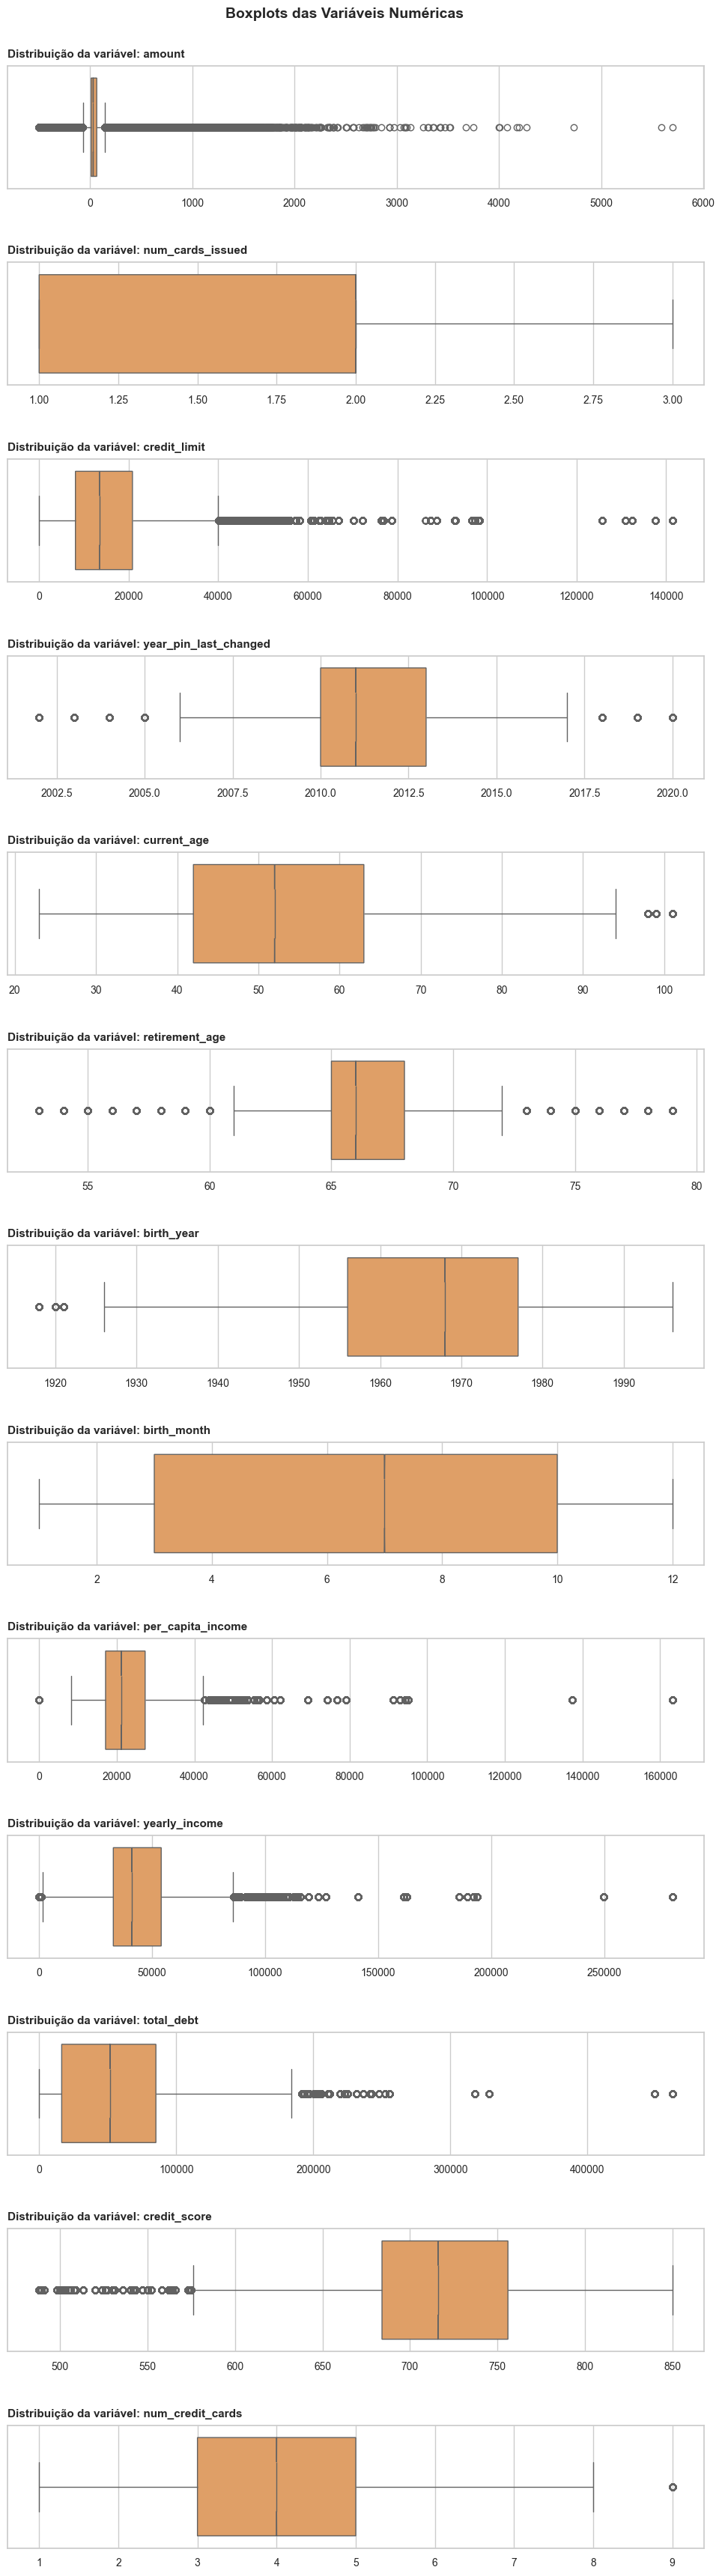

In [72]:
# Seleciona as variáveis numéricas e remove as colunas indesejadas
colunas_numericas = df_train_val.select_dtypes(
    include=['number']).columns.drop(colunas_excluir)

# Número de gráficos a serem exibidos
n_plots = len(colunas_numericas)

# Cria a figura e os subplots dinamicamente
fig, axs = plt.subplots(n_plots, 1, figsize=(12, 3 * n_plots),
                        gridspec_kw={'hspace': 0.6})

# Se houver apenas um gráfico, ajusta axs para ser uma lista
if n_plots == 1:
    axs = [axs]

# Loop para criar cada boxplot
for ax, col in zip(axs, colunas_numericas):
    sns.boxplot(x=df_train_val[col], ax=ax, notch=True, 
                color='#f39e53', orient='h')
    # Define título e remove rótulos dos eixos para evitar poluição visual
    ax.set_title(f'Distribuição da variável: {col}', loc='left', fontsize=11,
                 pad=8, fontweight='bold')
    ax.set(xlabel='', ylabel='')
    # Ajusta o tamanho dos rótulos
    ax.tick_params(labelsize=10)
    # Exibe os números no eixo x sem notação científica
    ax.ticklabel_format(style='plain', axis='x')

# Ajuste manual do espaço superior (local do título)
fig.subplots_adjust(top=0.96)

# Adiciona um título geral
fig.suptitle(
    'Boxplots das Variáveis Numéricas', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


#### 4.2.3. Análise dos outliers identificados

In [88]:
# Seleciona as variáveis numéricas e remove as colunas indesejadas
colunas_numericas = df_train_val.select_dtypes(
    include=['number']).columns.drop(colunas_excluir)

# Lista para armazenar as informações de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df_train_val[col].quantile(.25)
    Q3 = df_train_val[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df_train_val[col] < limite_inferior).sum()
    outliers_acima = (df_train_val[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df_train_val.shape[0]
    
    # Armazena resultados em um dicionário
    resultados_outliers.append({
        'Variável': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicionários em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Variável (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))



Resumo dos Outliers por Variável (ordenado por maior %)


,Variável,IIQ,Limite Inferior,Limite Superior,Outliers Abaixo,Outliers Acima,Total Outliers,% Outliers
0,retirement_age,3.00,60.50,72.50,270747,204537,475284,10.662
1,amount,54.76,-73.22,145.82,129803,223515,353318,7.926
2,per_capita_income,10195.00,1820.50,42600.50,24801,244116,268917,6.033
3,yearly_income,21196.00,1023.00,85807.00,14760,235454,250214,5.613
4,year_pin_last_changed,3.00,2005.50,2017.50,64869,143782,208651,4.681
5,credit_limit,12739.00,-11008.50,39947.50,0,153245,153245,3.438
6,credit_score,72.00,576.00,864.00,147559,0,147559,3.310
7,total_debt,68723.00,-86647.50,188244.50,0,97803,97803,2.194
8,current_age,21.00,10.50,94.50,0,30472,30472,0.684
9,birth_year,21.00,1924.50,2008.50,30472,0,30472,0.684
